In [10]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pickle 

## Load the datasets 
data1 = pickle.load(open('good.data.pickle','rb'))
data2 = pickle.load(open('bad.data.pickle','rb'))


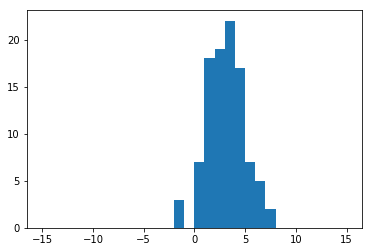

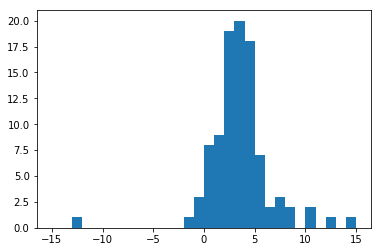

In [15]:
plt.hist(data1['x'],range=[-15,15],bins=30); # The data is sampled from a single Gaussian
plt.figure();
plt.hist(data2['x'],range=[-15,15],bins=30); # The data was sampled from a mixture

In [27]:
mod = pystan.StanModel('ppc.stan')
# Compiling model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_21d15fa1f5988612a67a841338f9cb18 NOW.


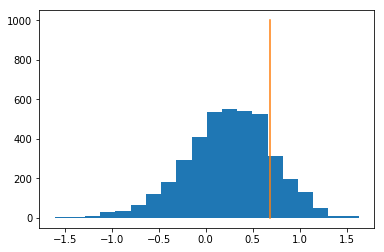

In [44]:
Res_good = mod.sampling(data=data1,sample_file='good_result.csv')
rep_x = Res_good.extract()['rep_x']
# Extract tthe replicated datasets
perc = scipy.stats.scoreatpercentile(rep_x,5,axis=1)
# Compute the percentile

plt.hist(perc,bins=20);
# Overplot the data
plt.plot([scipy.stats.scoreatpercentile(data1['x'],5)]*2,[-1,1000])

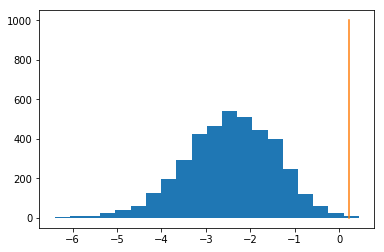

In [43]:
Res_bad = mod.sampling(data=data2,sample_file='bad_result.csv')
rep_x = Res_bad.extract()['rep_x']
# Extract tthe replicated datasets

perc = scipy.stats.scoreatpercentile(rep_x,5,axis=1)
plt.hist(perc,bins=20);
# Overplot the data
plt.plot([scipy.stats.scoreatpercentile(data2['x'],5)]*2,[-1,1000])